<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:180%; font-family:Arial, sans-serif; background-color:#C33B2F; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> Retail Sales Predictions </b></div>

![customers](https://r2.starryai.com/results/1050152342/da955f92-19ae-4e99-ba3e-03e1825c8518.webp)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#196094; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 1. Introduction </b></div>

## 📊 About the project

In retail, being able to predict sales accurately is essential for making smart business decisions. This project focuses on building models to forecast sales by using a dataset that includes various factors affecting sales, such as discounts, marketing spend, and seasonal trends like holidays.

This project will not only predict sales but also evaluate the performance of different models such as linear regression, decision trees, and gradient boosting methods, among others. The comparison will help identify the most effective model for improving sales forecasting accuracy in real-world retail settings.

## 🔑 Key Objectives:
- Build and compare different models to predict retail sales.
- Analyze how features like marketing, discounts, and holidays affect sales.
- Find the most effective model for forecasting future sales.

<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#196094; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 2. Importing Necessary Libraries </b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from matplotlib.colors import LinearSegmentedColormap

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

custom_palette = ['#1560B0', '#C33B2F', '#EAD59F', '#6AA8CD', '#D69642', '#D6E5EE', '#695D5E']
sns.set_theme(context='notebook', palette=custom_palette, style='whitegrid')

<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#196094; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. Loading and Understanding Data </b></div>

In [2]:
file_path = 'Retail_sales.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [4]:
df.shape

(30000, 11)

In [5]:
df.describe()

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,2.973833,49.944033
std,2.779759e+07,3.323929,2568.639288,5.974530,64.401655
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [7]:
# Check for missing values
df.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

In [8]:
df['Store ID'].nunique()

1

In [9]:
df['Store Location'].nunique()

243

In [10]:
df['Product ID'].nunique()

42

In [11]:
df['Product Category'].nunique()

4

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
    Initial data exploration reveals the following key points:
    <ul>
        <li>🧮 <strong>Observations:</strong> The dataset consists of 30,000 rows and 11 columns.</li>
        <li>⚠️ <strong>Missing Values:</strong> No missing values are present in the dataset.</li>
        <li>📊 <strong>Column Types:</strong> The dataset includes a mix of integers, floats, objects, and boolean values.</li>
        <li>📉 <strong>Marketing and Discounts:</strong> Most days had no marketing spend or discounts applied.</li>
        <li>💰 <strong>Maximum Values:</strong> The highest marketing spend was $199, and the largest discount offered was 20%.</li>
        <li>🏪 <strong>Store ID:</strong> There is only one unique value in 'Store ID', so this column can be dropped.</li>
        <li>🔢 <strong>Product ID:</strong> While 'Product ID' is numerical, it contains 42 unique values.</li>
        <li>🌍 <strong>Product Location:</strong> There are 243 unique product locations in the dataset.</li>
    </ul>
    </p>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#196094; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 4. Exploratory Data Analysis </b></div>

## ✨ Pairplot

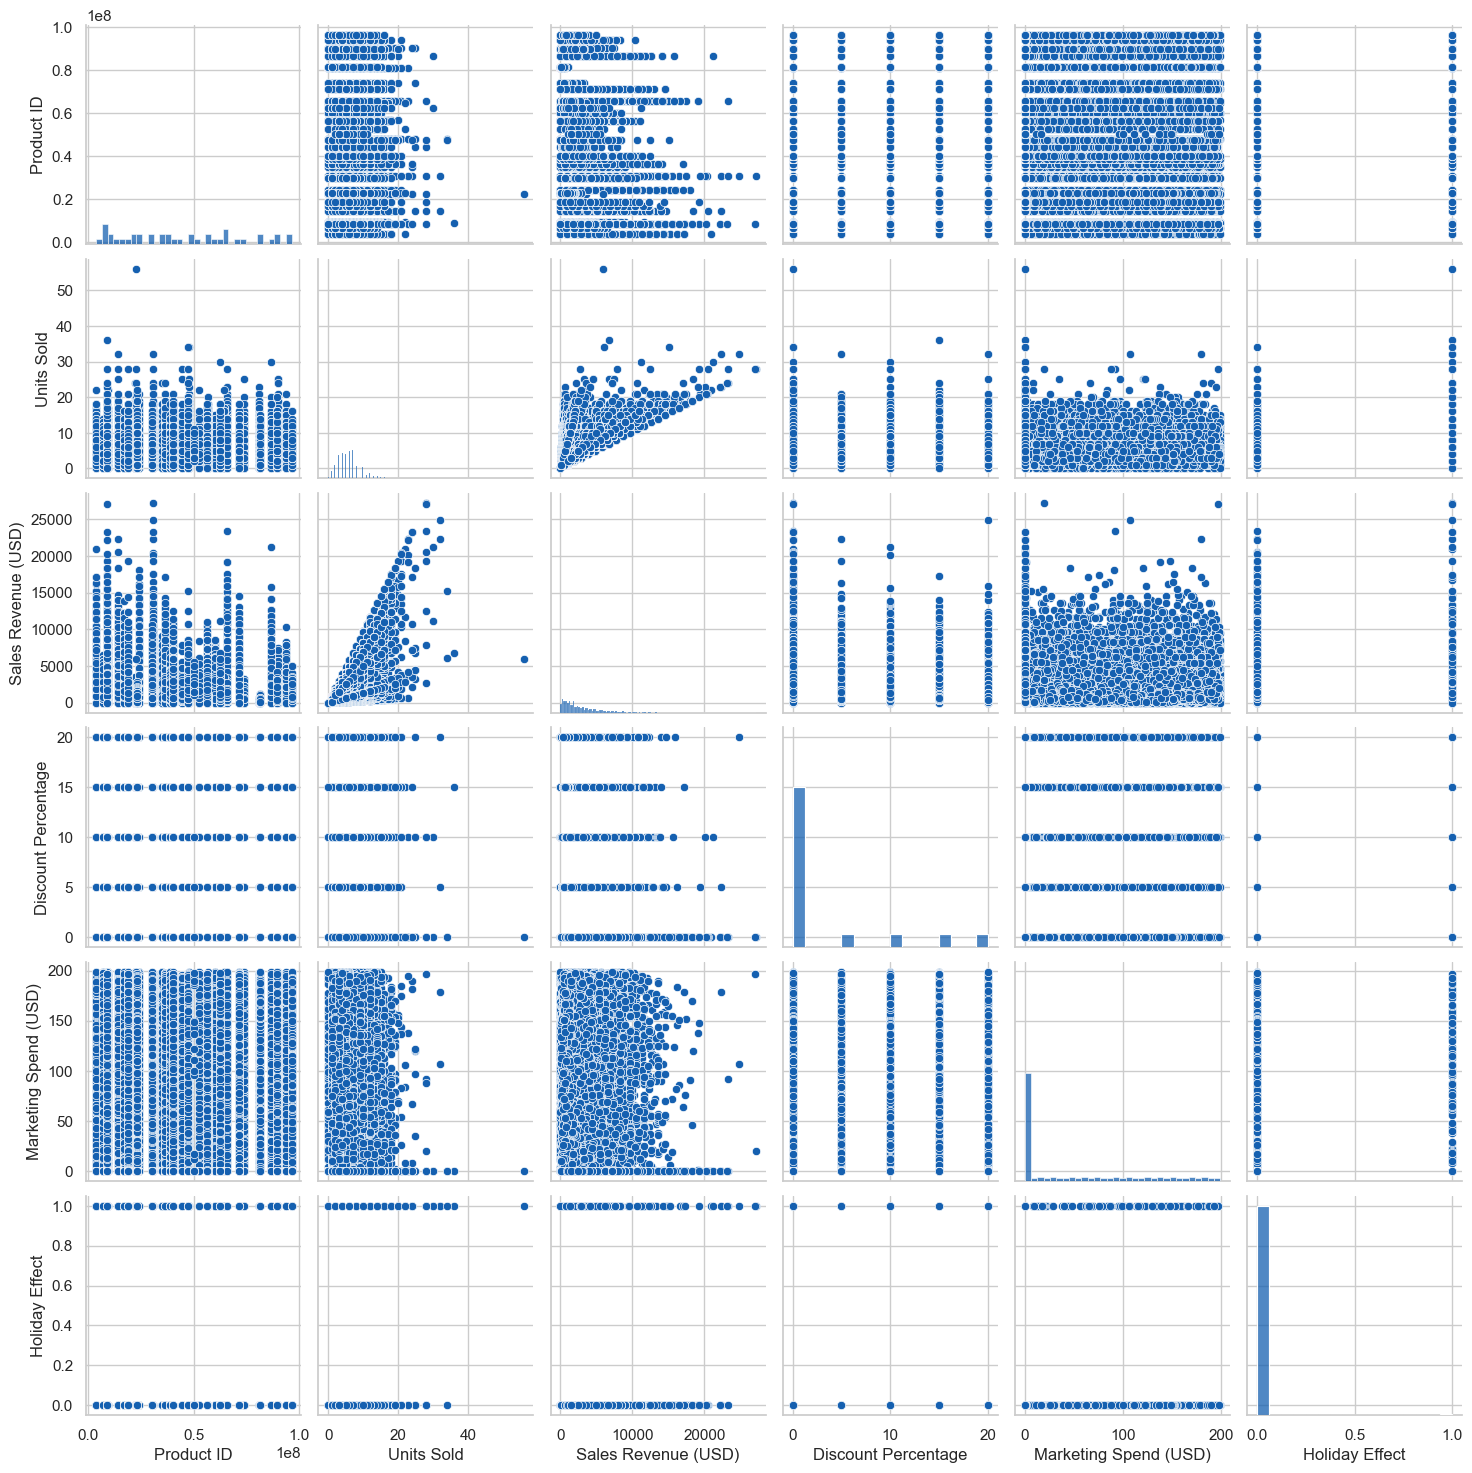

In [12]:
sns.pairplot(df)
plt.show()

## 📉 Histograms

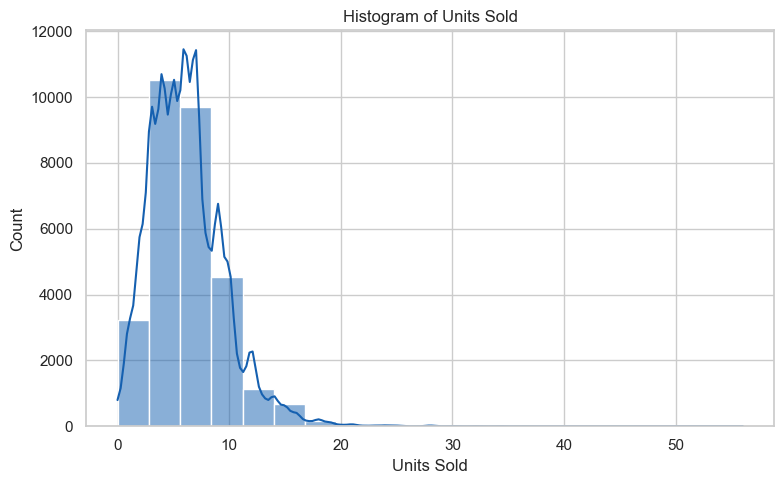

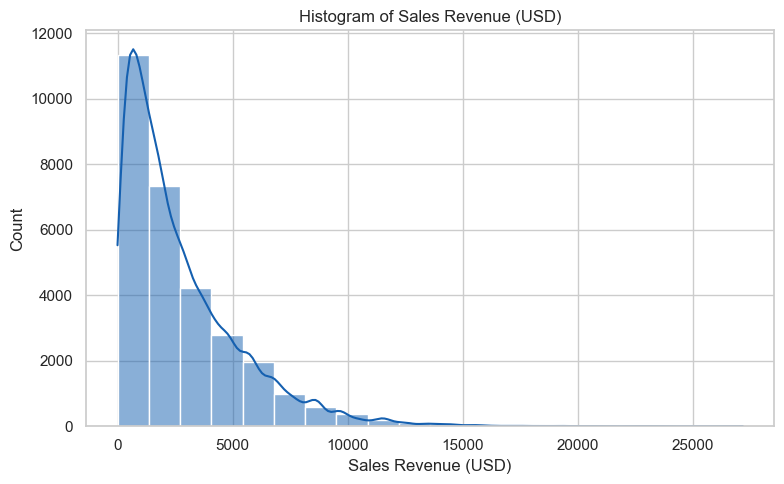

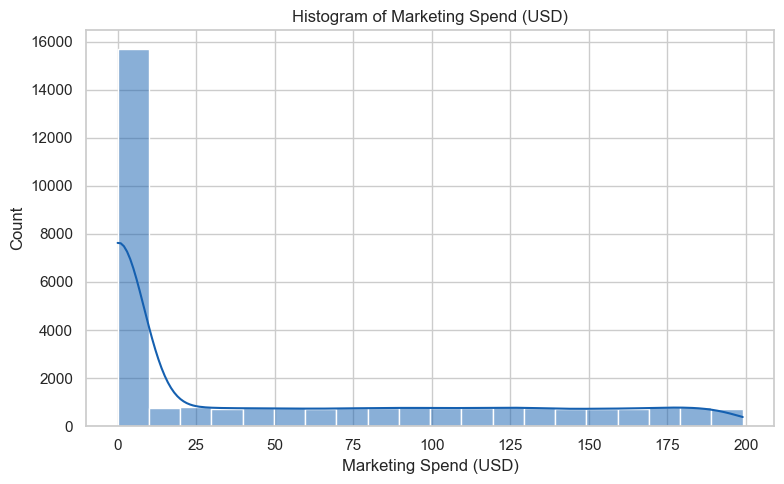

In [13]:
numerical_cols_to_plot = ['Units Sold', 'Sales Revenue (USD)','Marketing Spend (USD)']

# Plot histograms for each numerical column
for column in numerical_cols_to_plot:
   
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

## 📊 Countplots

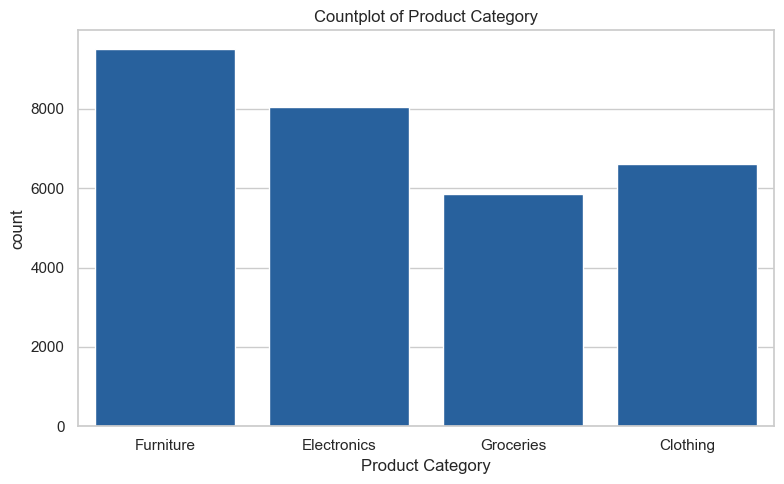

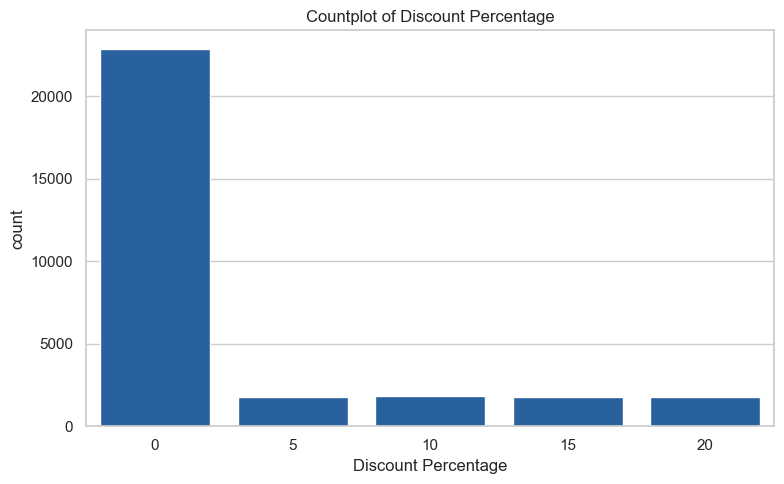

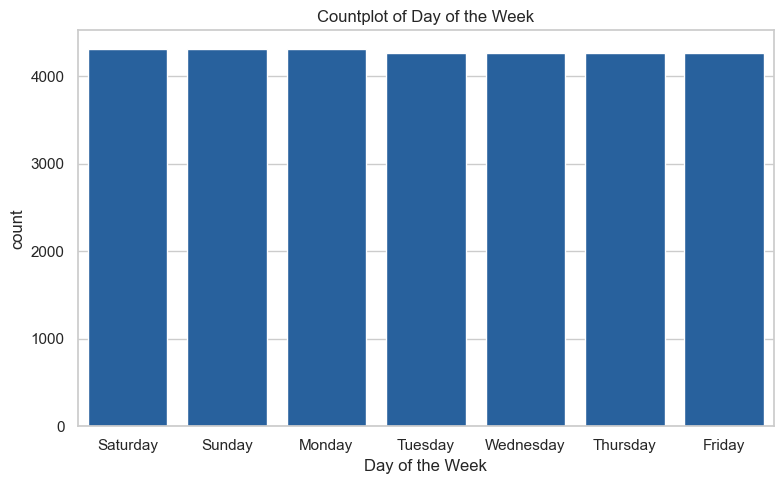

In [14]:
categorical_columns_to_plot = ['Product Category', 'Discount Percentage', 'Day of the Week']

# Plot countplots for each categorical column
for column in categorical_columns_to_plot:
   
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

## 🥧 Pie Chart

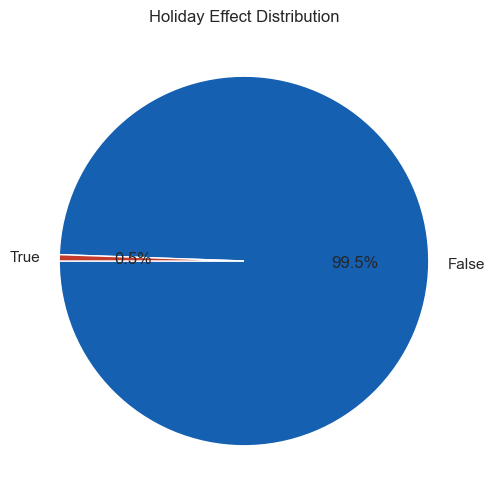

In [15]:
# Define the Holiday Effect categories and count occurences
categories = [False, True]
counts = df['Holiday Effect'].value_counts().tolist()

# Plot the pie chart with the counts of each Holiday Effect category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=180, colors=custom_palette)
plt.title('Holiday Effect Distribution')
plt.show()

## 📦 Box plots

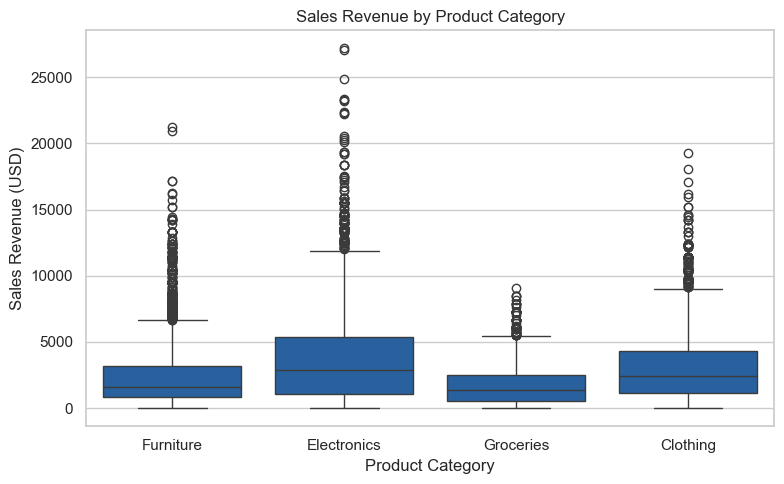

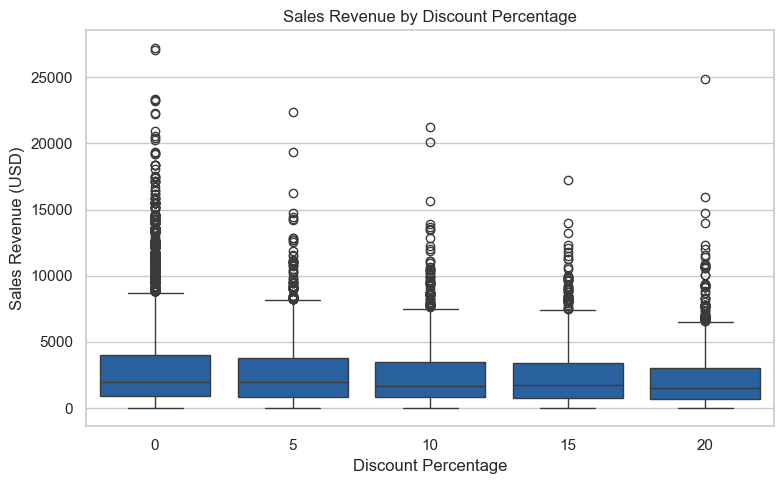

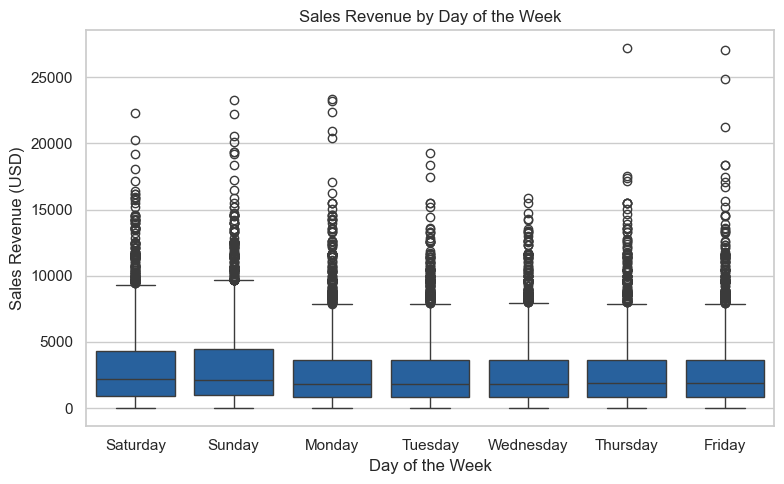

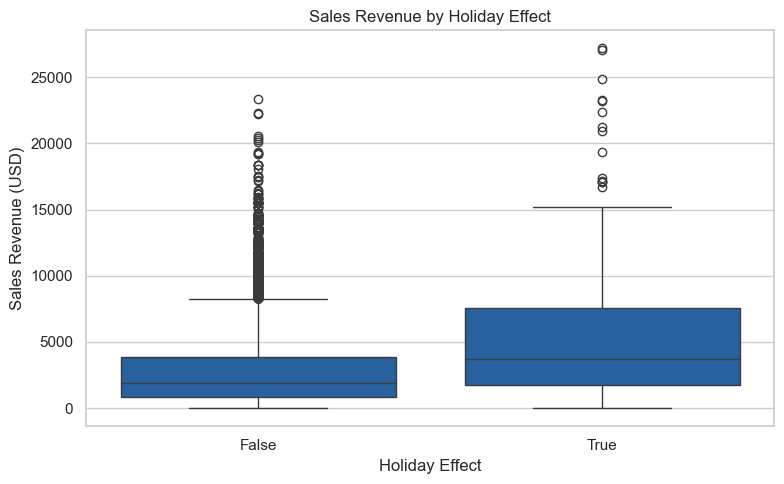

In [16]:
columns_to_plot = ['Product Category', 'Discount Percentage', 'Day of the Week', 'Holiday Effect']

# Plot box plots
for column in columns_to_plot:
   
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='Sales Revenue (USD)')
    plt.title(f'Sales Revenue by {column}')
    
    plt.tight_layout()
    plt.show()

## 🌡️ Correlation Heatmap

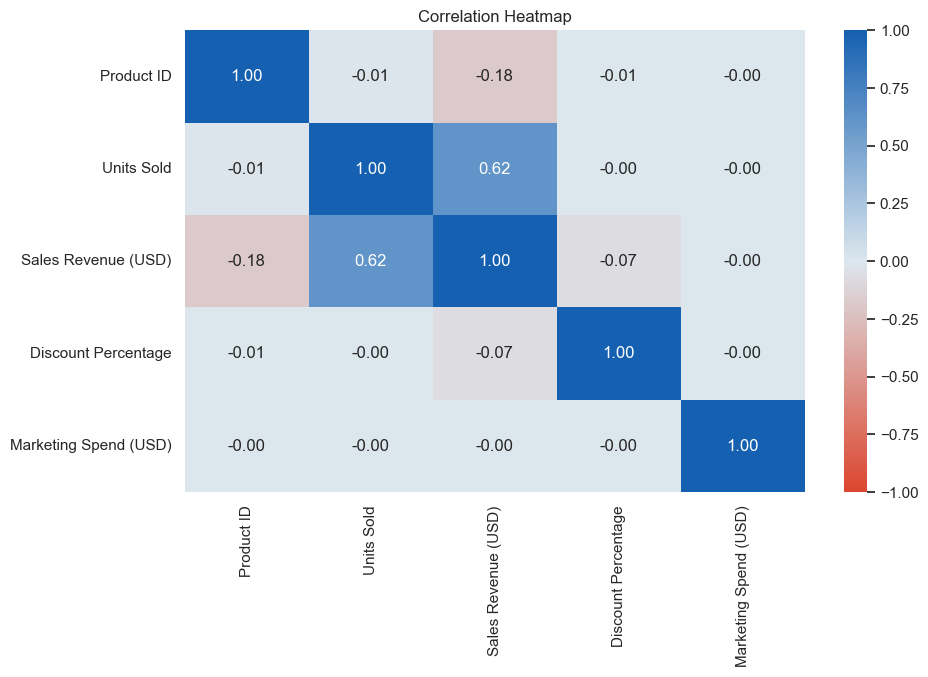

In [17]:
# Define the custom colormap
colors = ["#DC462F", "#DCE7EE", "#1560B0"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Create a correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap=cmap, center=0, vmin=-1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #498394; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
    Observations from the visualization:
    <ul>
        <li>📊 <strong>Numerical Distribution:</strong> Numerical columns have a right-skewed distribution.</li>
        <li>📅 <strong>Days of the Week:</strong> The distribution of days of the week is well balanced.</li>
        <li>📉 <strong>Discount Percentage:</strong> The distribution of discount percentage is imbalanced, with most values being 0.</li>
        <li>🛋️📦🍎👗 <strong>Product Categories:</strong> There are 4 product categories: Furniture, Electronics, Groceries, and Clothing.</li>
        <li>💸 <strong>Revenue by Product Categories:</strong> Electronics and Clothing are correlated with higher revenues.</li>
        <li>🎉 <strong>Holiday Effect:</strong> The holiday effect is mostly 'False' in 99.5% of the cases (which is expected, as holidays are not daily occurrences).</li>
        <li>🎁 <strong>Holiday Revenue:</strong> Holidays tend to bring more revenue overall.</li>
        <li>🔗 <strong>Correlation:</strong> The only highly correlated numerical variables are 'Units Sold' and 'Sales Revenue'.</li>
    </ul>
    </p>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#196094; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 5. Machine Learning </b></div>

## 📏 Data Preprocessing

In [18]:
# Define features and target variable
X = df[['Product ID','Store Location', 'Product Category', 'Units Sold', 'Day of the Week',
        'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = df['Sales Revenue (USD)']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
categorical_cols = ['Product ID', 'Store Location', 'Product Category', 'Day of the Week']
numerical_cols = ['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)'] 
boolean_cols = ['Holiday Effect']

In [21]:
# Define your preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('bool', 'passthrough', boolean_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

## 🤖 Training and Comparing 10 Different Models

In [22]:
# Upgrade scikit-learn to the latest version
%pip install --upgrade scikit-learn

# Initialize list to collect results
results = []

# Function to evaluate models and store results for visualization
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_test = pipeline.predict(X_test)
    
    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Print results
    print(f"{model_name} Model:")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")
    
    # Append results to the list for visualization
    results.append({'Model': model_name, 'R²': test_r2, 'RMSE': test_rmse})

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
print(sklearn.__version__)

1.6.0


In [27]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor()
}


In [28]:
# Iterate over the models to evaluate each
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

Linear Regression Model:
Test R²: 0.8629
Test RMSE: 959.3323

SGD Regressor Model:
Test R²: 0.8622
Test RMSE: 961.4854

Random Forest Model:
Test R²: 0.9967
Test RMSE: 149.7998

ElasticNet Model:
Test R²: 0.0894
Test RMSE: 2471.9898

K-Neighbors Regressor Model:
Test R²: 0.7790
Test RMSE: 1217.7166

Decision Tree Model:
Test R²: 0.9964
Test RMSE: 155.3290

SVR Model:
Test R²: -0.0478
Test RMSE: 2651.6621

Gradient Boosting Model:
Test R²: 0.8913
Test RMSE: 853.9157

Bagging Model:
Test R²: 0.9965
Test RMSE: 153.7848



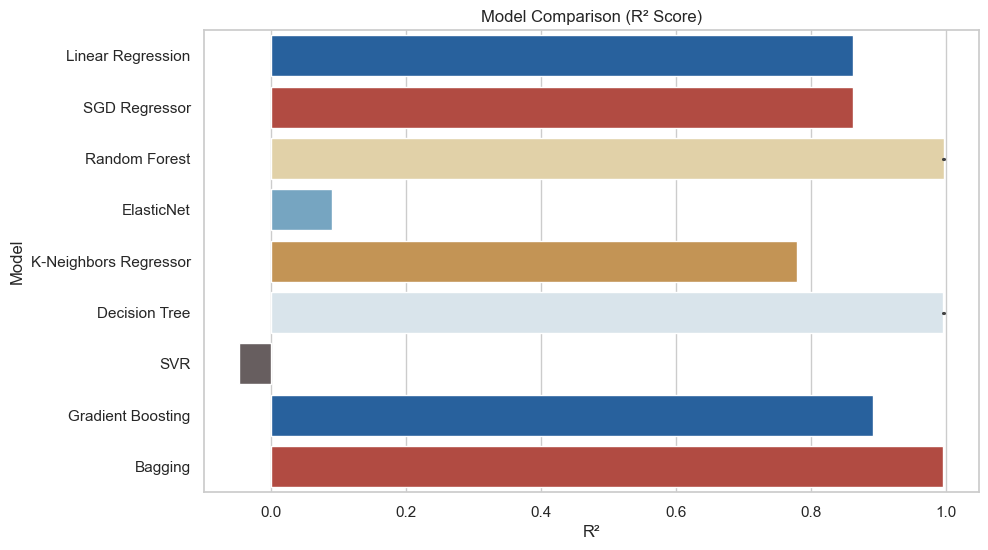

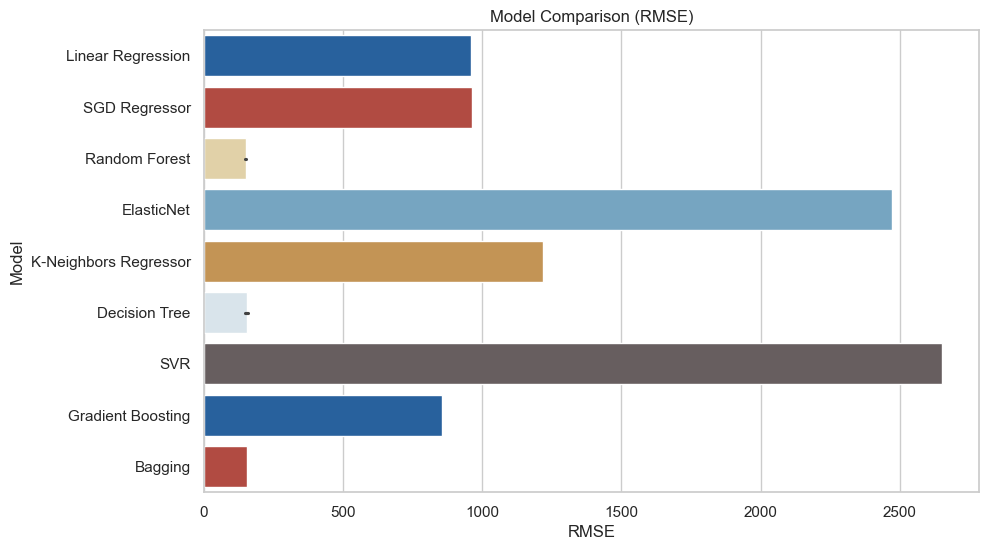

In [29]:
# Plot R² comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='R²', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (R² Score)')
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (RMSE)')
plt.show()


## 🎯 Perfect Score, but is it a correct one?

<div style="padding: 20px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); border: 3px solid #C33B2F; border-radius: 10px; width: 75%; margin: 20px auto; background-color: #f9f9f9;">
    <p style="font-size: 20px; font-family: Arial, sans-serif; line-height: 1.6em; color: #333; text-align: justify;">
        We achieved <strong>outstanding results</strong>, with an <strong>R² score of 99.6%</strong>! It's also worth noting that a simple and highly interpretable model, the <strong>Decision Tree</strong>, performed exceptionally well, achieving 99.6%.
    </p>
    <p style="font-size: 20px; font-family: Arial, sans-serif; line-height: 1.6em; color: #333; text-align: justify;">
        While we should be pleased with these results, there's an important issue. I didn't mention it earlier, but by including the <strong>"Items Sold"</strong> feature when predicting <strong>"Sales Revenue"</strong>, we've introduced <strong>data leakage</strong>. These two features are directly correlated, and in a real-world scenario, we wouldn’t know the number of items sold in advance when predicting future sales. 
        Let's remove this feature and repeat the process.
    </p>
</div>


## 🔄 Let's Try Again

Linear Regression Model:
Test R²: 0.5417
Test RMSE: 1753.7249

SGD Regressor Model:
Test R²: 0.5427
Test RMSE: 1751.6998

Random Forest Model:
Test R²: 0.4709
Test RMSE: 1884.2620

ElasticNet Model:
Test R²: 0.0846
Test RMSE: 2478.4418

K-Neighbors Regressor Model:
Test R²: 0.4416
Test RMSE: 1935.7042

Decision Tree Model:
Test R²: 0.2270
Test RMSE: 2277.5370

SVR Model:
Test R²: -0.0495
Test RMSE: 2653.7860

Gradient Boosting Model:
Test R²: 0.5043
Test RMSE: 1823.7582

Bagging Model:
Test R²: 0.4439
Test RMSE: 1931.7763



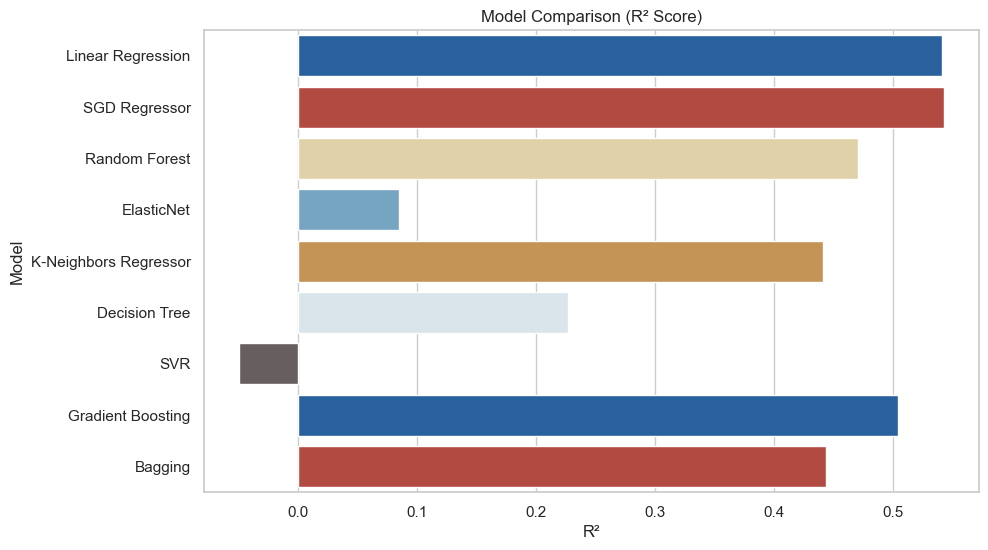

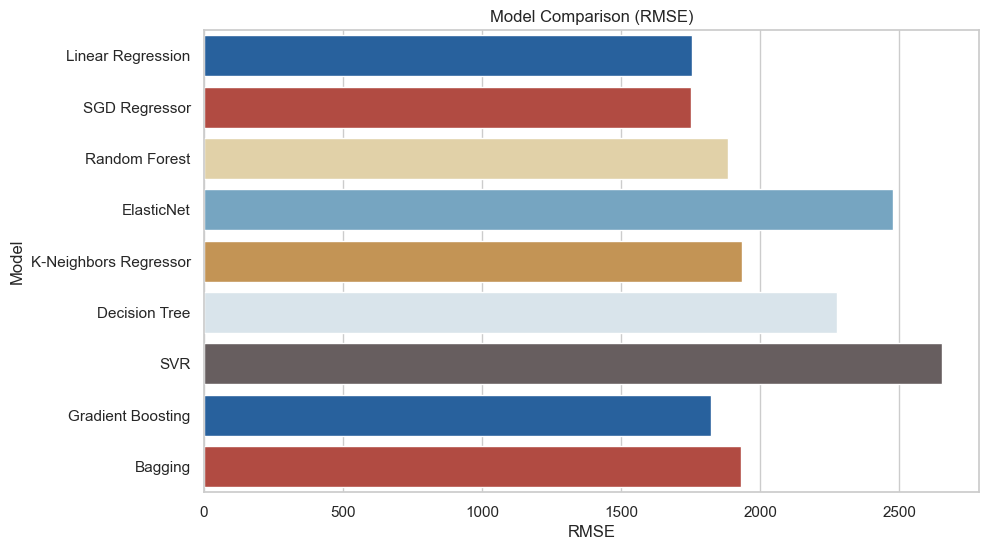

In [31]:
# Define correct features
X = df[['Product ID','Store Location', 'Product Category', 'Day of the Week','Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]

# Replace numerical columns list without Items Sold
numerical_cols = ['Discount Percentage', 'Marketing Spend (USD)'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('bool', 'passthrough', boolean_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Initialize list to collect results
results = []

# Function to evaluate models and store results for visualization
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_test = pipeline.predict(X_test)
    
    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Print results
    print(f"{model_name} Model:")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")
    
    # Append results to the list for visualization
    results.append({'Model': model_name, 'R²': test_r2, 'RMSE': test_rmse})

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor()
}

# Iterate over the models to evaluate each
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot R² comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='R²', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (R² Score)')
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (RMSE)')
plt.show()

<div style="padding: 20px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); border: 3px solid #C33B2F; border-radius: 10px; width: 75%; margin: 20px auto; background-color: #f9f9f9;">
    <p style="font-size: 20px; font-family: Arial, sans-serif; line-height: 1.6em; color: #333; text-align: justify;">
        <strong>Wow!</strong> Just by removing one variable (Items Sold) the R² score dropped significantly from 99.8% to 54.3%! That’s a huge difference, but now we can be confident there’s no data leakage. While the results aren't as impressive, they are far more reliable.
    </p>
    <p style="font-size: 20px; font-family: Arial, sans-serif; line-height: 1.6em; color: #333; text-align: justify;">
        <strong>Let's try a few more things:</strong> 
        <ul style="font-size: 20px; font-family: Arial, sans-serif; color: #333; line-height: 1.6em; list-style-type: disc; margin-left: 20px;">
            <li>Use the Date column by extracting new features such as year, month, day, etc.</li>
            <li>Drop Outliers.</li>
            <li>Incorporate hyperparameter tuning for machine learning models to optimize performance.</li>
            <li>Explore Deep Learning approaches to potentially improve results further.</li>
        </ul>
    </p>
</div>


In [32]:
# remove outliers
numerical_cols = df.select_dtypes(include=['number']).columns
df = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)]

In [33]:
# Convert Date to DateTime Format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date Column as the Index
df.set_index('Date', inplace=True)

# Extract useful date features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [34]:
# Define new features and target
X = df[['Product ID', 'Discount Percentage', 'Marketing Spend (USD)', 'Store Location',
       'Product Category', 'Holiday Effect', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend']]
y = df['Sales Revenue (USD)']

# Split the data into training and testing sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Update lists of different datatypes
categorical_cols = ['Product ID', 'Store Location', 'Product Category']
numerical_cols = ['Discount Percentage', 'Marketing Spend (USD)', 'Year', 'Month', 'DayOfWeek']
boolean_cols = ['Holiday Effect', 'IsWeekend']

# Define preprocessing step (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('bool', 'passthrough', boolean_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

Best params for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Decision Tree Model:
Test R²: 0.4667
Test RMSE: 1636.3197

Best params for Gradient Boosting: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Model:
Test R²: 0.5984
Test RMSE: 1419.9250



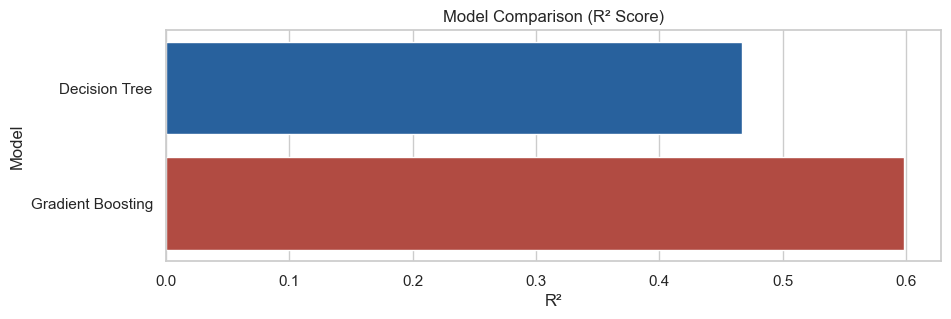

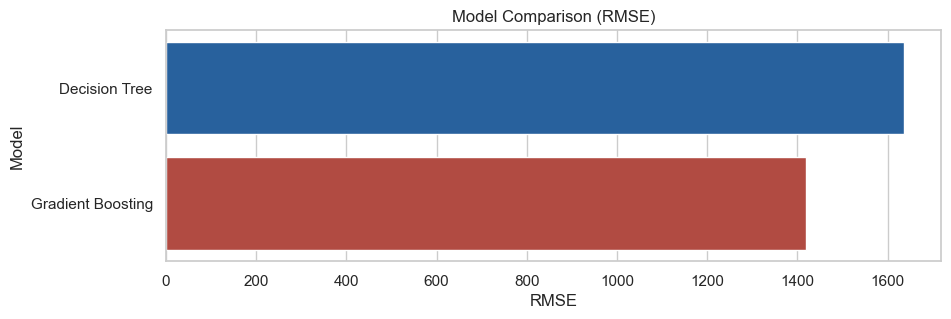

In [36]:
# Initialize list to collect results
results = []

# Define hyperparameter grids for the selected models
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Function to evaluate models with hyperparameter tuning
def evaluate_model_with_tuning(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f"Best params for {model_name}: {search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = best_model.predict(X_test)

    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Print results
    print(f"{model_name} Model:")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")

    # Append results to the list for visualization
    results.append({'Model': model_name, 'R²': test_r2, 'RMSE': test_rmse})

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Iterate over the models to evaluate each with hyperparameter tuning
for model_name, model in models.items():
    param_grid = param_grids.get(model_name, None)  # Get the param grid for the model, if available
    evaluate_model_with_tuning(model, param_grid, X_train_processed, y_train, X_test_processed, y_test, model_name)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot R² comparison
plt.figure(figsize=(10, 3))
sns.barplot(x='R²', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (R² Score)')
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 3))
sns.barplot(x='RMSE', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (RMSE)')
plt.show()

In [37]:
## Neural Network wth TensorFlow

# Define a Sequential model
model = Sequential([
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=1, activation='relu')             # Output layer with ReLU activation (suitable for regression non-negative tasks)
])

# Compile the model with Mean Squared Error loss function and train the model
model.compile(loss = MeanSquaredError())
model.fit(X_train_processed, y_train, epochs=100)

Epoch 1/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 10701992.0000
Epoch 2/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 4433735.5000
Epoch 3/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 3203823.0000
Epoch 4/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 2341844.7500
Epoch 5/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 2098384.0000
Epoch 6/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 2052130.7500
Epoch 7/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - loss: 2109204.5000
Epoch 8/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 2097108.8750
Epoch 9/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 2058730.7500
Epoch 10/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 2092238.8750
Epoch 11/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - loss: 2051319.0000
Epoch 12/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 2127849.7500
Epoch 13/100
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 2067220.1250
Epoch 1

In [38]:
y_pred = model.predict(X_test_processed)

test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}\n")

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test R²: 0.5818
Test RMSE: 1448.9526



<div style="padding: 20px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); border: 3px solid #C33B2F; border-radius: 10px; width: 75%; margin: 20px auto; background-color: #f9f9f9;">
    <p style="font-size: 20px; font-family: Arial, sans-serif; line-height: 1.6em; color: #333; text-align: justify;">
        <strong>Conclusion:</strong> </p>
    <p style="font-size: 20px; font-family: Arial, sans-serif; line-height: 1.6em; color: #333; text-align: justify;">
        The best performing model in this analysis is the Gradient Boosting Model, with a Test R² of 0.5818 and a Test RMSE of 1448.9526. While these results may not seem exceptionally high, they are consistent with the findings from the exploratory data analysis (EDA), which revealed weak correlations between most features and the target variable. The exception was the number of items sold, which had a stronger correlation but was excluded from the model to avoid introducing data leakage.
    </p>
</div>